In [3]:
import pandas as pd

 
df = pd.read_csv('IIoT_Smart_Parking_Management.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.isnull().sum()
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Date'] = df['Timestamp'].dt.day         
df['Day_of_Week']= df['Timestamp'].dt.day_name()  
df['Hour']   = df['Timestamp'].dt.hour
#df.to_csv('IIoT_Smart_Parking_Management_clean.csv')
print("Null values")
df.isnull().sum()

Null values


Timestamp                    0
Parking_Spot_ID              0
Sensor_Reading_Proximity     0
Sensor_Reading_Pressure      0
Vehicle_Type_Weight          0
Vehicle_Type_Height          0
User_Type                    0
Weather_Temperature          0
Weather_Precipitation        0
Nearby_Traffic_Level         0
Entry_Time                   0
Exit_Time                    0
Electric_Vehicle             0
Reserved_Status              0
Occupancy_Rate               0
Payment_Amount               0
Parking_Lot_Section          0
Payment_Status               0
Occupancy_Status             0
Vehicle_Type                 0
Parking_Violation            0
Sensor_Reading_Ultrasonic    0
Parking_Duration             0
Environmental_Noise_Level    0
Dynamic_Pricing_Factor       0
Spot_Size                    0
Proximity_To_Exit            0
User_Parking_History         0
Year                         0
Month                        0
Date                         0
Day_of_Week                  0
Hour    

<H2> EDA </H2>


<Axes: >

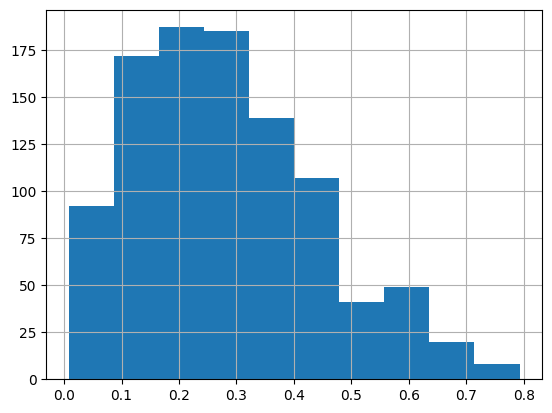

In [13]:
df['Occupancy_Rate'].describe()
df['Occupancy_Rate'].hist()

<Axes: xlabel='Month'>

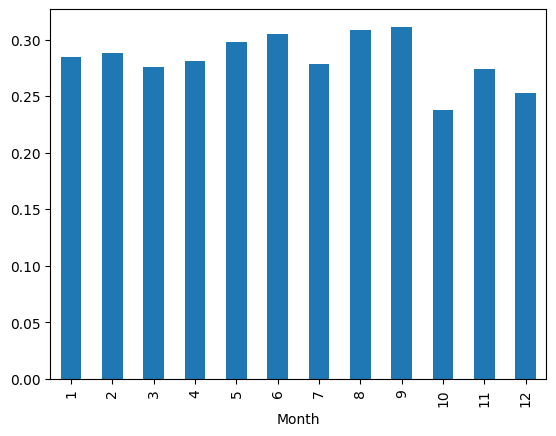

In [16]:
monthly_mean = df.groupby('Month')['Occupancy_Rate'].mean()
monthly_mean.plot(kind='bar')

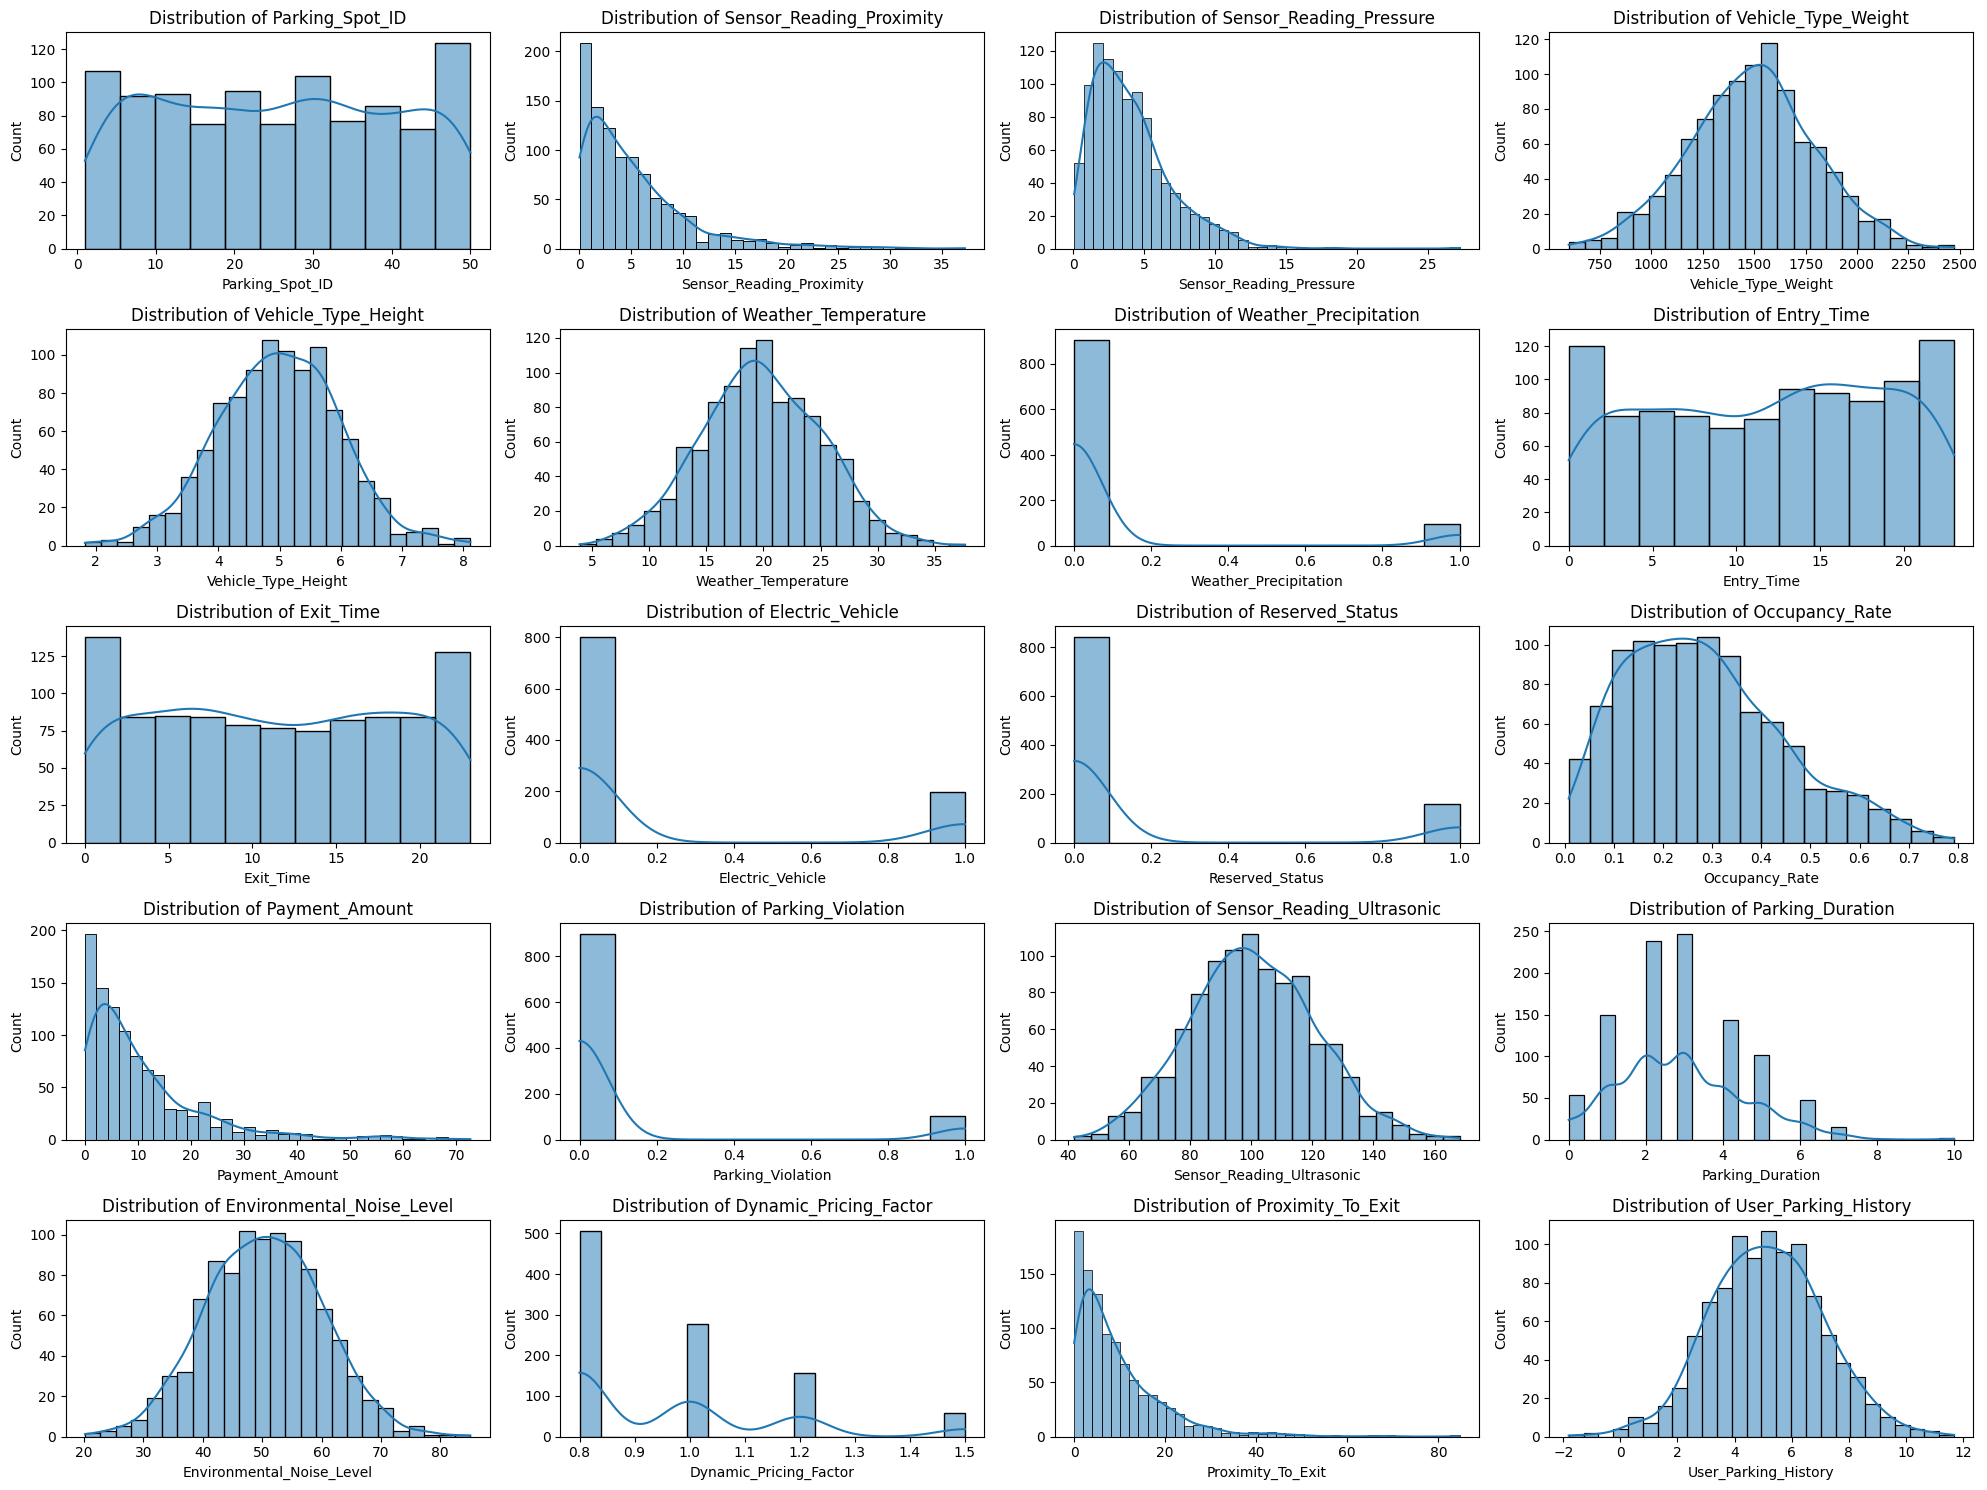

Index(['User_Type', 'Nearby_Traffic_Level', 'Parking_Lot_Section',
       'Payment_Status', 'Occupancy_Status', 'Vehicle_Type', 'Spot_Size',
       'Day_of_Week'],
      dtype='object')


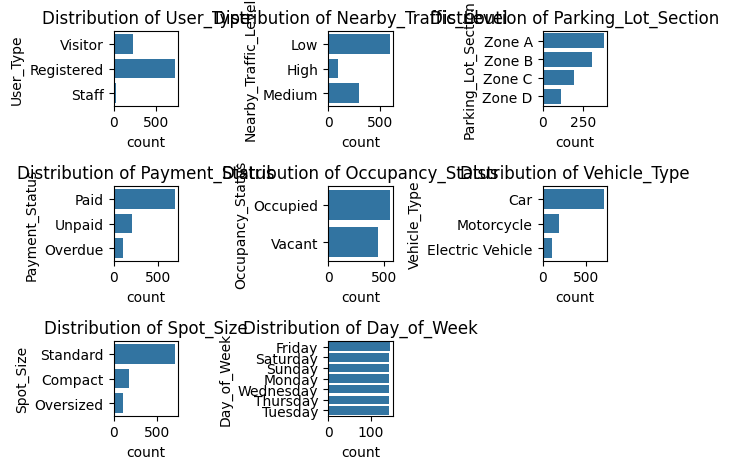

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(20, 15))

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
 
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

ctg_cols = df.select_dtypes(include=['object']).columns
print(ctg_cols)
for i, col in enumerate(ctg_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(y=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

<H2> Create synthetic data </H2>

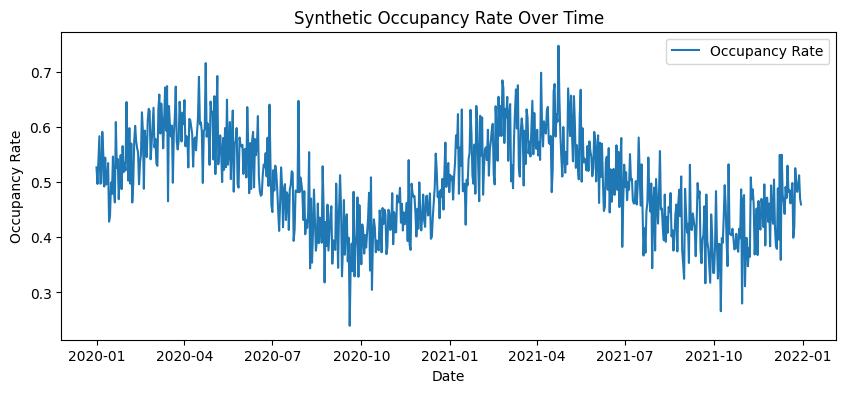

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
 
np.random.seed(42)

date_range = pd.date_range(start='2020-01-01', periods=730, freq='D')

occupancy_rate = 0.5 + 0.1 * np.sin(2 * np.pi * date_range.dayofyear / 365) + 0.05 * np.random.randn(len(date_range))
occupancy_rate = np.clip(occupancy_rate, 0, 1)  # Ensure values are between 0 and 1
#print(occupancy_rate)
df = pd.DataFrame({'ds': date_range, 'Occupancy_Rate': occupancy_rate})

# Plot the synthetic occupancy data
plt.figure(figsize=(10, 4))
plt.plot(df['ds'], df['Occupancy_Rate'], label='Occupancy Rate')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.title('Synthetic Occupancy Rate Over Time')
plt.legend()
plt.show()

<H2> Model building </H2>

X shape: (700, 30) y shape: (700,)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2027 - val_loss: 0.0400
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0223 - val_loss: 0.0107
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - val_loss: 0.0110
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0112
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0108
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104 - val_loss: 0.0112
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - val_loss: 0.0110
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102 - val_lo

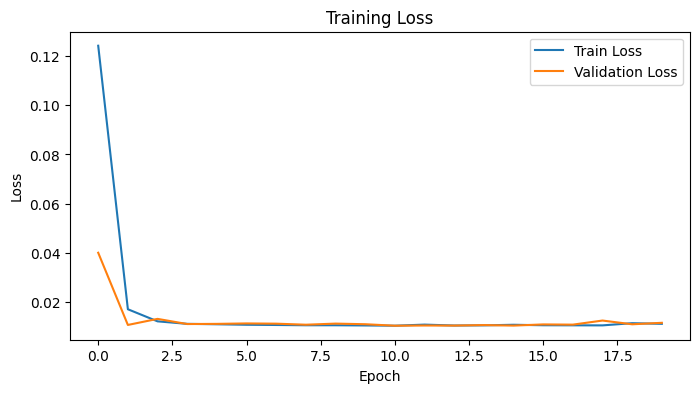

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


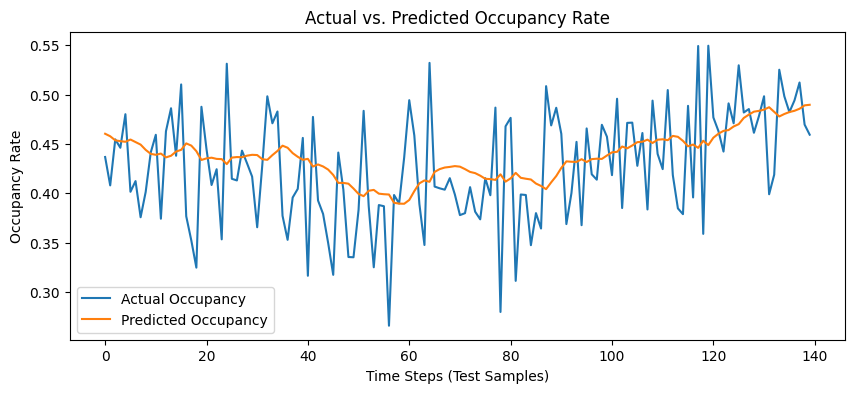

In [35]:

 
scaler = MinMaxScaler(feature_range=(0, 1))
df['Occupancy_Rate'] = scaler.fit_transform(df[['Occupancy_Rate']])
 
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30   
data = df['Occupancy_Rate'].values
X, y = create_sequences(data, window_size)
print("X shape:", X.shape, "y shape:", y.shape)  
 
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) 
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
 
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))  # 50 LSTM units
model.add(Dense(1))  # Single output (next day's occupancy rate)

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
 
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
 
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
 
predictions = model.predict(X_test)


predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(y_test_inv, label='Actual Occupancy')
plt.plot(predictions_inv, label='Predicted Occupancy')
plt.xlabel('Time Steps (Test Samples)')
plt.ylabel('Occupancy Rate')
plt.title("Actual vs. Predicted Occupancy Rate")
plt.legend()
plt.show()


<h3>Model performance</h3>

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_inv, predictions_inv)
mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions_inv)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R² Score): {r2:.4f}")

Mean Absolute Error (MAE): 0.0432
Mean Squared Error (MSE): 0.0029
Root Mean Squared Error (RMSE): 0.0539
R-squared (R² Score): 0.0925


<h3>Model prediction for next 2 days</h3>

In [49]:
last_sequence = data[-window_size:]  
last_sequence = last_sequence.reshape(1, window_size, 1)

future_predictions = []

num_days_to_predict = 2
for i in range(num_days_to_predict):
     next_day_pred_scaled = model.predict(last_sequence)  # shape: (1, 1)

     future_predictions.append(next_day_pred_scaled[0, 0])
     next_value = np.array([[[next_day_pred_scaled[0, 0]]]])  # shape (1,1,1)

     last_sequence = np.append(last_sequence[:, 1:, :], next_value, axis=1)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions_original = scaler.inverse_transform(future_predictions)

print("Predicted occupancy rates for the next 2 days:")
print(future_predictions_original)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predicted occupancy rates for the next 2 days:
[[0.4888678 ]
 [0.48966447]]
